# Analysing #caa Hashtag on Twitter

![](image.PNG)

### Objective 1: Analysis of public tweets. 
With recent event across India like abolition of article 370, new
traffic rule, CAA etc, lot of tweets are available. We need to understand the public opinion on below
tweets

Data set: Search and find – Twitter (1000 tweets or above) and scrapping the data

#### After searching popular hashtag on CAA got 1000 tweets on '#caa',so proceeded with that hashtag

In [1]:
# STEP 1: Import all the required libraries and will the API variables

import pandas as pd
import tweepy

# Create the API variable (You can Use your API's for security reason i am not providing my API's) 

API_KEY = "..................."

API_SECRET = "...................."

ACCESS_TOKEN = ".........................................."

ACCESS_SECRET="........................................"

In [2]:
# STEP 2: Create a auth object to authorize the connection of python with 
# twitter

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)

# Next step will be to give the authorization access

auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)

In [3]:
# STEP 3: To check if the connection is working or not

connection = tweepy.API(auth)

# Lets check the user profile

user = connection.me()

print(user.name)

Megha Muralidharan


#### From twitter, we can scrap the tweets by using HASHTAGS

In [4]:
# Scrapping the tweets using the hashtage #caa
#lang=en will help us to extract only the english tweets

tweets = connection.search(q=['#caa'], lang = 'en', 
                          tweet_mode = 'extended')

tweets


[Status(_api=<tweepy.api.API object at 0x000001F52852FB08>, _json={'created_at': 'Mon Dec 28 07:10:47 +0000 2020', 'id': 1343454332675522560, 'id_str': '1343454332675522560', 'full_text': "RT @KanchanGupta: When Maoists destroy telecom towers it is called Red Terrorism.\nWhen alleged 'farmers' destroy 1,300 telecom towers in #P…", 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KanchanGupta', 'name': 'Kanchan Gupta', 'id': 44704537, 'id_str': '44704537', 'indices': [3, 16]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 885490891401580544, 'id_str': '885490891401580544', 'name': 'SarathyAmudhan', 'screen_name': 'am

In [5]:
# Convert the json output to a pandas data frame. In this case I would
# like to create a data frame containing the following: 

# 1) Date 2) text 3) user name 4)location 4) retweet 5) favorite

# STEP 1: Create the empty list

date = []
text = []
user_name = []
location = []
retweet = []
favorite = []

# STEP 2: Using a for loop to iterate within the home_tweets

for x in tweets:
    date.append(x.created_at)
    text.append(x.full_text)
    user_name.append(x.user.name)
    location.append(x.author.location)
    retweet.append(x.retweet_count)
    favorite.append(x.favorite_count)

# STEP 3: To convert all these list into a data frame

df1 = pd.DataFrame({"Date" : date,
                  "Tweet" : text,
                  "User Name" : user_name,
                  "Location": location,
                  "Retweet" : retweet,
                  "Favorite" : favorite})

df1.head()

,Date,Tweet,User Name,Location,Retweet,Favorite
0,2020-12-28 07:10:47,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,India,439,0
1,2020-12-28 07:10:44,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,India,439,0
2,2020-12-28 07:10:40,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,"New Delhi, India",439,0
3,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,"Mohali, India",439,0
4,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,,439,0


In [6]:
df1.shape

(15, 6)

In all the above methods, we can extract only 15 latest tweets. Thus if one need more number tweets to do the analysis we need to use cursor() command from tweepy library.

I want to scrap 1000 tweets from hashtag #caa using cursor()

In [7]:
# Lets create a dummy data frame: 

df = pd.DataFrame(columns = ['Date', 'Tweet', 'User_Name', 'Retweet','Location',
                            'Favorite'])

df

,Date,Tweet,User_Name,Retweet,Location,Favorite


In [8]:
# This is the most important part - Creating a streaming user define 
# function. The will be used to extract the tweets based on the numbers 
# you want and will save the tweets as excel file.

def stream(query, file_name):
    i = 0
    for x in tweepy.Cursor(connection.search, q = query, lang = 'en',
                          tweet_mode = 'extended').items():
        print(i, end = '\r')
        df.loc[i, 'Date'] = x.created_at
        df.loc[i, 'Tweet'] = x.full_text
        df.loc[i, 'User_Name'] = x.user.name
        df.loc[i, 'Location']=x.author.location
        df.loc[i, 'Retweet'] = x.retweet_count
        df.loc[i, 'Favorite'] = x.favorite_count
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 1001:
            break
        else:
            pass

In [9]:
stream(query=['#caa'],file_name='Caa')

In [10]:
df.shape

(1001, 6)

In [11]:
df.shape

(1001, 6)

In [13]:
# Number of words in each tweets in df

# Creating a lambda function to find the word count

# Split tweets into words and then count the words

fun_words = lambda x : len(str(x).split())

# Use this lambda function of data frame df

df['Word_count'] = df['Tweet'].apply(fun_words)

df.head()

,Date,Tweet,User_Name,Retweet,Location,Favorite,Word_count
0,2020-12-28 07:10:47,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,439,India,0,21
1,2020-12-28 07:10:44,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,439,India,0,21
2,2020-12-28 07:10:40,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,439,"New Delhi, India",0,21
3,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,439,"Mohali, India",0,21
4,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,439,,0,21


In [14]:
# Find the number of stop words 

import nltk

In [15]:
# Importing the stopwords and printing the list of stopwords

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Find the number of stopwords in each tweets in the data frame df

# Create another lambda function to find out the no of stop words in each tweets

stop = stopwords.words('english')

fun_stop_words = lambda x : len([x for x in x.split() if x in stop])

# Applying the above function on tweet column of my df

df['Stop_word_count'] = df['Tweet'].apply(fun_stop_words)

df.head()

,Date,Tweet,User_Name,Retweet,Location,Favorite,Word_count,Stop_word_count
0,2020-12-28 07:10:47,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,439,India,0,21,3
1,2020-12-28 07:10:44,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,439,India,0,21,3
2,2020-12-28 07:10:40,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,439,"New Delhi, India",0,21,3
3,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,439,"Mohali, India",0,21,3
4,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,439,,0,21,3


In [59]:
# Importing the libraries

import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# To remove any warning

import warnings

warnings.filterwarnings('ignore')

# Import the data set

df = pd.read_excel("CAA.xlsx") 
  
df.head()
#df.shape

,Unnamed: 0,Date,Tweet,User_Name,Retweet,Location,Favorite
0,0,2020-12-28 07:10:47,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,439,India,0
1,1,2020-12-28 07:10:44,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,439,India,0
2,2,2020-12-28 07:10:40,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,439,"New Delhi, India",0
3,3,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,439,"Mohali, India",0
4,4,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,439,NaN,0


In [60]:
df = df.drop(['Unnamed: 0'],axis=1)

In [61]:
df.head()

,Date,Tweet,User_Name,Retweet,Location,Favorite
0,2020-12-28 07:10:47,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,439,India,0
1,2020-12-28 07:10:44,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,439,India,0
2,2020-12-28 07:10:40,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,439,"New Delhi, India",0
3,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,439,"Mohali, India",0
4,2020-12-28 07:10:15,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,439,NaN,0


In [62]:
# Lets sep. the column of tweet column from the df data frame

df_tweet = df[['Tweet']]

# If you want to read any tweet

df_tweet['Tweet'][0]

"RT @KanchanGupta: When Maoists destroy telecom towers it is called Red Terrorism.\nWhen alleged 'farmers' destroy 1,300 telecom towers in #P…"

In [63]:
df_tweet.head()

,Tweet
0,RT @KanchanGupta: When Maoists destroy telecom...
1,RT @KanchanGupta: When Maoists destroy telecom...
2,RT @KanchanGupta: When Maoists destroy telecom...
3,RT @KanchanGupta: When Maoists destroy telecom...
4,RT @KanchanGupta: When Maoists destroy telecom...


In [64]:
# STEP 1 - convert the text into lower case

df_tweet['lower_text'] = df_tweet['Tweet'].str.lower()

df_tweet.head()

,Tweet,lower_text
0,RT @KanchanGupta: When Maoists destroy telecom...,rt @kanchangupta: when maoists destroy telecom...
1,RT @KanchanGupta: When Maoists destroy telecom...,rt @kanchangupta: when maoists destroy telecom...
2,RT @KanchanGupta: When Maoists destroy telecom...,rt @kanchangupta: when maoists destroy telecom...
3,RT @KanchanGupta: When Maoists destroy telecom...,rt @kanchangupta: when maoists destroy telecom...
4,RT @KanchanGupta: When Maoists destroy telecom...,rt @kanchangupta: when maoists destroy telecom...


In [65]:
# STEP 2 - Removing the puch, special chars. numbers etc from the lower_text

df_tweet['new_text'] = df_tweet['lower_text'].str.replace("[^a-z' ]" , "")

df_tweet['new_text'][0]

"rt kanchangupta when maoists destroy telecom towers it is called red terrorismwhen alleged 'farmers' destroy  telecom towers in p"

In [66]:
# STEP 3 - Removing the stopwords

from nltk.corpus import stopwords

# Create a list of stopwords

stop = stopwords.words('english')

In [67]:
# Create a user define function to split the text of your review, then do
# a match of words with the stop list and return the words which are not 
# present in the stop list

def sw(x):
    x = [y for y in x.split() if y not in stop]
    return " ".join(x)

# Lets apply the UDF sw on the new_text column of the data set

df_tweet['clean_text'] = df_tweet['new_text'].apply(sw)

df_tweet['clean_text'][0]

"rt kanchangupta maoists destroy telecom towers called red terrorismwhen alleged 'farmers' destroy telecom towers p"

In [68]:
# STEP 4 - Creating the DTM

# STEP 4.1 - Create a count vectorizer object

count_vec = CountVectorizer()

# STEP 4.2 - Fit this count vectorizer object on the clean_text column of dt_text

count_vec.fit(df_tweet['clean_text'])

# STEP 4.3 - Create a DTM by using a command fit_transform

DTM = count_vec.fit_transform(df_tweet['clean_text'])

DTM

<1001x589 sparse matrix of type '<class 'numpy.int64'>'
	with 11775 stored elements in Compressed Sparse Row format>

#### CALCULATING SPARSITY OF THE MATRIX

In [69]:
(1001*589)-11775

577814

In [70]:
577814/589589

0.9800284605038425

In [71]:
# The sparsity of the matrix 

((1001*589)- 11775)/(1001*589)

0.9800284605038425

In [72]:
# The sparsity of the matrix can be treated by using min_df in the 
# count vectorizer object

# STEP 4 - Creating the New DTM

# STEP 4.1 - Create a count vectorizer object

count_vec_new = CountVectorizer(min_df=0.001)

# STEP 4.2 - Fit this count vectorizer object on the clean_text column of dt_text

count_vec_new.fit(df_tweet['clean_text'])

# STEP 4.3 - Create a DTM by using a command fit_transform

DTM_new = count_vec_new.fit_transform(df_tweet['clean_text'])

DTM_new

<1001x201 sparse matrix of type '<class 'numpy.int64'>'
	with 11387 stored elements in Compressed Sparse Row format>

In [73]:
# The terms as list is stored in the vectorizer object under the argument 
# get_feature_names()

len(count_vec_new.get_feature_names())

201

In [74]:
# FINAL STEP - DTM cannot be converted into a data frame directly.It can be 
# done by converting the sparse matrix into a array and then passing it
# to the pd.DataFrame

DTM_DF = pd.DataFrame(DTM_new.toarray(), 
                      columns = count_vec_new.get_feature_names())

DTM_DF.head()

,abt,activists,actual,afghanistan,ago,agreed,alisstrongvoice,alleged,alokbhatt,also,...,two,university,vijaygajera,violence,week,west,who,wrote,year,zerotolerance
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Finding the freq of the words

word_freq = DTM_DF.sum().reset_index()

word_freq

# Lets rename the columns 

word_table = word_freq.rename(columns = {'index' : 'TERMS', 
                                        0 : 'FREQ'})

word_table

# Finding the top 20 words

word_table.sort_values(by= 'FREQ', ascending = False).head(20)

,TERMS,FREQ
162,rt,962
181,telecom,828
45,destroy,828
190,towers,828
90,kanchangupta,825
23,caa,536
58,farmers,420
97,law,416
25,called,416
125,nothing,415


BIGRAM DTM - The above DTM is a unigram where each column represent a single term. With unigram DTM is it very diffcult to understand what customers are talking about. If we can present a combination of words in the sequence in which they come together in the reviews, we will be in good condition to understand, what customers are talking about. 

A unigram DTM can be converted into a bigram DTM by passing an argument to CountVectorizer(ngram_range = (2,2))

Lets try to create a bigram DTM compare the same with unigram

In [76]:
# STEP 4 - Creating the BIGRAM DTM

# STEP 4.1 - Create a count vectorizer object

count_vec_bigram = CountVectorizer(min_df=0.001, ngram_range=(2,2))

# STEP 4.2 - Fit this count vectorizer object on the clean_text column of dt_text

count_vec_bigram.fit(df_tweet['clean_text'])

# STEP 4.3 - Create a DTM by using a command fit_transform

DTM_bigram = count_vec_bigram.fit_transform(df_tweet['clean_text'])

DTM_bigram

<1001x191 sparse matrix of type '<class 'numpy.int64'>'
	with 10677 stored elements in Compressed Sparse Row format>

In [77]:
# FINAL STEP - We will not convert our DTM into a data frame. This can be 
# done by converting the sparse matrix into a array and then passing it
# to the pd.DataFrame

DTM_BIGRAM_DF = pd.DataFrame(DTM_bigram.toarray(), 
                      columns = count_vec_bigram.get_feature_names())

DTM_BIGRAM_DF.head()

,abt kashmiri,activists forefront,actual problem,afghanistan opposing,ago orfonline,agreed actual,alisstrongvoice forgotten,alleged farmers,alokbhatt ended,also supported,...,two former,university delhi,vijaygajera also,violence destruction,week two,wrote year,year ago,year resistance,year since,zerotolerance violence
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Finding the freq of the words

word_freq_bigram = DTM_BIGRAM_DF.sum().reset_index()

word_freq_bigram

# Lets rename the columns 

word_table_bigram = word_freq_bigram.rename(columns = {'index' : 'TERMS', 
                                        0 : 'FREQ'})

word_table_bigram

# Finding the top 20 words

word_table_bigram.sort_values(by= 'FREQ', ascending = False).head(20)

,TERMS,FREQ
46,destroy telecom,828
174,telecom towers,828
151,rt kanchangupta,825
21,caa nothing,415
139,red terrorismwhen,414
100,maoists destroy,414
7,alleged farmers,414
60,farmers destroy,414
28,called red,414
180,towers called,414


TF-IDF - Using the count vectorizer we are just trying to identify the importance of a word based on its freq. This may not be a very good matrix as its just based on the count of words. Thus we must try to find the importance of a word by using TF(Term Freq) and IDF(Inverse document Freq). 

TF-IDF weightage is often used in information retrieval and text mining. This weightage is statistical measure used to evaluate how important a word is to a document in a collection of documents. The importance increases proportionally to the number of time a words appear in the document but is offset by the frequency of th word in the collection of document. 

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [80]:
# STEP 4 - Creating the BIGRAM DTM

# STEP 4.1 - Create a count vectorizer object

tfidf_vec_bigram = TfidfVectorizer(min_df=0.05, ngram_range=(2,2))

# STEP 4.2 - Fit this count vectorizer object on the clean_text column of dt_text

tfidf_vec_bigram.fit(df_tweet['clean_text'])

# STEP 4.3 - Create a DTM by using a command fit_transform

DTM_bigram = tfidf_vec_bigram.fit_transform(df_tweet['clean_text'])

DTM_bigram

<1001x34 sparse matrix of type '<class 'numpy.float64'>'
	with 9965 stored elements in Compressed Sparse Row format>

In [81]:
# FINAL STEP - We will not convert our DTM into a data frame. This can be 
# done by converting the sparse matrix into a array and then passing it
# to the pd.DataFrame

DTM_BIGRAM_DF = pd.DataFrame(DTM_bigram.toarray(), 
                      columns = tfidf_vec_bigram.get_feature_names())

DTM_BIGRAM_DF.head()

,afghanistan opposing,alleged farmers,antimuslim citizenship,backstabbed ditched,blatantly antimuslim,caa nothing,called red,citizenship law,destroy telecom,ditched persecuted,...,pakistan afghanistan,passage new,persecuted sikh,red terrorismwhen,rt kanchangupta,rt legallro,sikh minorities,telecom towers,terrorismwhen alleged,towers called
0,0.0,0.246897,0.0,0.0,0.0,0.0,0.246897,0.0,0.493794,0.0,...,0.0,0.0,0.0,0.246897,0.156572,0.0,0.0,0.493794,0.246897,0.246897
1,0.0,0.246897,0.0,0.0,0.0,0.0,0.246897,0.0,0.493794,0.0,...,0.0,0.0,0.0,0.246897,0.156572,0.0,0.0,0.493794,0.246897,0.246897
2,0.0,0.246897,0.0,0.0,0.0,0.0,0.246897,0.0,0.493794,0.0,...,0.0,0.0,0.0,0.246897,0.156572,0.0,0.0,0.493794,0.246897,0.246897
3,0.0,0.246897,0.0,0.0,0.0,0.0,0.246897,0.0,0.493794,0.0,...,0.0,0.0,0.0,0.246897,0.156572,0.0,0.0,0.493794,0.246897,0.246897
4,0.0,0.246897,0.0,0.0,0.0,0.0,0.246897,0.0,0.493794,0.0,...,0.0,0.0,0.0,0.246897,0.156572,0.0,0.0,0.493794,0.246897,0.246897


In [82]:
# Finding the Total tfidf score of the words

word_tfidf_bigram = DTM_BIGRAM_DF.sum().reset_index()

word_tfidf_bigram

# Lets rename the columns 

word_table_bigram = word_tfidf_bigram.rename(columns = {'index' : 'TERMS', 
                                        0 : 'TF_IDF Score'})

word_table_bigram

# Finding the top 20 words

word_table_bigram.sort_values(by= 'TF_IDF Score', ascending = False).head(20)

,TERMS,TF_IDF Score
8,destroy telecom,204.453173
31,telecom towers,204.453173
28,rt kanchangupta,145.573914
5,caa nothing,129.774615
15,law nytimes,128.102321
22,nytimes caa,128.102321
25,passage new,128.102321
20,new blatantly,128.102321
7,citizenship law,128.102321
4,blatantly antimuslim,128.102321


#### SENTIMENT ANALYSIS USING VADER - It is to analyze the impact of words used in a sentence to identify the over all polority of the statement.

In [43]:
# Install the vaderSentiment

!pip install vaderSentiment

In [44]:
# Import the function from varderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a object 

senti = SentimentIntensityAnalyzer()

In [45]:
# Lets take the column of reviews.text from our df
#No need to omit special character ,capital letter,stop word

df_tweet1 = df[['Tweet','User_Name','Location']]

df_tweet1.head()

,Tweet,User_Name,Location
0,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,India
1,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,India
2,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,"New Delhi, India"
3,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,"Mohali, India"
4,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,NaN


In [46]:
# Lets create a lambda function to calcuate the compound score using the 
# object senti. Then I will apply this lambda function on df_text to 
# calculate the compound score for each of our review.

fun = lambda x : senti.polarity_scores(x)['compound']

# Lets apply this fun on df_text

df_tweet1['Polarity Score'] = df_tweet1['Tweet'].apply(fun)
df_tweet1.head()

,Tweet,User_Name,Location,Polarity Score
0,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,India,-0.9118
1,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,India,-0.9118
2,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,"New Delhi, India",-0.9118
3,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,"Mohali, India",-0.9118
4,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,NaN,-0.9118


In [47]:
# Lets label the data as per the above slab

import numpy as np

df_tweet1['Category'] = np.where(df_tweet1['Polarity Score']>0.5, 'High Pos',
                               np.where((df_tweet1['Polarity Score']<=0.5) & (df_tweet1['Polarity Score']>0.2),'Pos',
                                       np.where((df_tweet1['Polarity Score']<=0.2)&(df_tweet1['Polarity Score']>-0.2), 'Netural',
                                               np.where((df_tweet1['Polarity Score']<=-0.2)&(df_tweet1['Polarity Score']> -0.5), "Neg",
                                                       np.where(df_tweet1['Polarity Score']<=-0.5, "High Neg", "NA")))))

df_tweet1.head()

,Tweet,User_Name,Location,Polarity Score,Category
0,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,India,-0.9118,High Neg
1,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,India,-0.9118,High Neg
2,RT @KanchanGupta: When Maoists destroy telecom...,Utsav Goel,"New Delhi, India",-0.9118,High Neg
3,RT @KanchanGupta: When Maoists destroy telecom...,Vijay Pal Chaudhary,"Mohali, India",-0.9118,High Neg
4,RT @KanchanGupta: When Maoists destroy telecom...,Shivaani K Talwar,NaN,-0.9118,High Neg


In [48]:
# Lets see how many reviews are classified in which all categories

df_tweet1.groupby('Category').size()

Category
High Neg    459
High Pos     14
Neg          76
Netural     447
Pos           5
dtype: int64

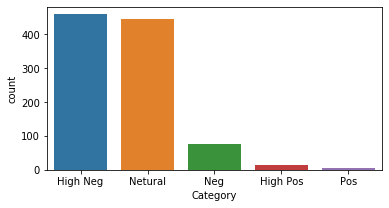

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,3))
sns.countplot(x='Category',data=df_tweet1)

In [50]:
df_high_pos=df_tweet1[df_tweet1['Category']=='High Pos']
df_high_pos.head(2)

,Tweet,User_Name,Location,Polarity Score,Category
224,RT @AniAkhtar: #Article 19(1)(a) of the #Const...,Syed Rajab,"جدة, المملكة العربية السعودية",0.5106,High Pos
454,Should India allow #Bagladeshi Sunni #Muslims?...,Anna Woodward,United Kingdom,0.9231,High Pos


In [87]:
HP_user_data=pd.DataFrame(df_high_pos.groupby('User_Name')['Polarity Score'].max().sort_values(ascending=False))
HP_user_data.head(5)

,Polarity Score
User_Name,
Anna Woodward,0.9231
Rohit tantia,0.8622
Sanjaya Gavalgana,0.8481
MKS,0.7964
Voice of the People,0.6597


In [88]:
HP_loc_data=pd.DataFrame(df_high_pos.groupby('Location')['Polarity Score'].max().sort_values(ascending=False))
HP_loc_data.head(5)

,Polarity Score
Location,
United Kingdom,0.9231
India,0.8481
"Beijing, China",0.6597
The Football Field,0.5707
"South Carolina, USA",0.5707


In [53]:
df_high_neg=df_tweet1[df_tweet1['Category']=='High Neg']
df_high_neg.head(2)

,Tweet,User_Name,Location,Polarity Score,Category
0,RT @KanchanGupta: When Maoists destroy telecom...,SarathyAmudhan,India,-0.9118,High Neg
1,RT @KanchanGupta: When Maoists destroy telecom...,Mage_In_Bharat,India,-0.9118,High Neg


In [83]:
HN_user_data=pd.DataFrame(df_high_neg.groupby('User_Name')['Polarity Score'].max().sort_values(ascending=True))
HN_user_data.head(5)

,Polarity Score
User_Name,
CoHNA (Coalition of Hindus of North America),-0.9278
./Buzzer 🇮🇳,-0.9118
ShasHank SuRι,-0.9118
Sharada Prasann Mahapatra,-0.9118
Shailendra Singh🇮🇳,-0.9118


In [84]:
HN_loc_data=pd.DataFrame(df_high_neg.groupby('Location')['Polarity Score'].max().sort_values(ascending=True))
HN_loc_data.head(10)

,Polarity Score
Location,
India,-0.9118
Noida,-0.9118
"Noida, India",-0.9118
North India,-0.9118
"Peterborough, England",-0.9118
Pune,-0.9118
"Pune, India",-0.9118
Punjab & MP,-0.9118
"Punjab, INDIA",-0.9118


#### INFERENCE: